# Mini Presentation - Harmoni Townes - Oct. 17, 2025


## Research Question

How does social vulnerability vary across U.S. counties and which factors (socioeconomic, household composition, minority status, housing/transportation) most strongly correlate with overall vulnerability?

## Dataset Documentation 

- **Source** https://catalog.data.gov/dataset/cdc-social-vulnerability-index-cdcsvi/resource/eb86174a-aa67-4875-9938-5b20974f35c4
- **Description:** The CDC Social Vulnerability Index (SVI) measures the relative vulnerability of all U.S. counties based on 15 different social factors grouped in themes suchh as; Socioeconomic Status, Household Disability, Minority Status, and Housing Type and Transportation 
- **Time Period:** The year of 2022
- **Reason For Selection:** I chose this dataset, because I find public health and community engagement interesting. An insight on how economic and social factors contrubite to vulnerabilities within communities is essential in understanding geoghraphical disparities. This topic is also relavant to policy and disaster management which is a field I am interested getting into.

In [34]:
import pandas as pd 

social_data = pd.read_csv( "s3://ia340-2025-fall-harmoni-28280/CDC_Social_Vulnerability_Index__CDCSVI_.csv" )
social_data.head()

#Imports the Pandas Library.
#Loads SVI dataset from your AWS S3 bucket into a DataFrame called social_data.
#Displays the first few rows the data looks like before you start cleaning or analyzing it.

,Condition,Condition_TotalPop,F_TOTAL,FeatureID,Geography,Name_Geography,NotSociallyVulnerable,OBJECTID,Quintile,RPL_Themes,Shape__Area,Shape__Length,TotalPopulation,WeightedAvgQuintile,Year,the_geom
0,56.06,2708.8192,0,53033001702,County,King County,0,19,3,0.4394,1.377931e+07,17476.412878,4832,0.634213,2018,MULTIPOLYGON (((-122.36335183837993 47.6906502...
1,30.21,2030.4141,1,53033000401,County,King County,0,4,2,0.6979,1.467311e+07,15741.893339,6721,0.379223,2018,MULTIPOLYGON (((-122.34524085215533 47.7341382...
2,71.17,2849.6468,0,53033001701,County,King County,0,18,3,0.2883,9.609032e+06,17164.460421,4004,0.634213,2018,MULTIPOLYGON (((-122.35010484040794 47.7050772...
3,65.00,2742.3500,0,53033029307,County,King County,0,279,3,0.3500,4.166315e+07,26347.755575,4219,0.634213,2018,MULTIPOLYGON (((-122.1546276460616 47.43036425...
4,57.38,1975.5934,0,53033029306,County,King County,0,278,3,0.4262,2.750991e+07,20992.195582,3443,0.634213,2018,MULTIPOLYGON (((-122.17605564625441 47.4158452...


In [35]:
import pandas as pd
import nbformat as nbf
from pathlib import Path
import os

#Creates and saves Jupyter notebook.
#Manage file path's safely.
#Interacts with os system.

In [36]:
csv_path = "CDC_Social_Vulnerability_Index__CDCSVI_.csv"

In [37]:
df = pd.read_csv(csv_path, low_memory=False)

In [30]:
print("Rows:", df.shape[0], "Columns:", df.shape[1])
print("\nColumns:")
print(list(df.columns)[:50])

Rows: 397 Columns: 17

Columns:
['Condition', 'Condition_TotalPop', 'F_TOTAL', 'FeatureID', 'Geography', 'Name_Geography', 'NotSociallyVulnerable', 'OBJECTID', 'Quintile', 'RPL_Themes', 'Shape__Area', 'Shape__Length', 'TotalPopulation', 'WeightedAvgQuintile', 'Year', 'the_geom', 'derived_overall_svi']


#provides scope of the dataset - quickly gives summary of records and fields 

In [31]:
nb = nbf.v4.new_notebook()

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
code_profile = """# Basic profile"""
display(df.info())
display(df.describe(include='all').T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Condition              397 non-null    float64
 1   Condition_TotalPop     397 non-null    float64
 2   F_TOTAL                397 non-null    int64  
 3   FeatureID              397 non-null    int64  
 4   Geography              397 non-null    object 
 5   Name_Geography         397 non-null    object 
 6   NotSociallyVulnerable  397 non-null    int64  
 7   OBJECTID               397 non-null    int64  
 8   Quintile               397 non-null    int64  
 9   RPL_Themes             397 non-null    float64
 10  Shape__Area            397 non-null    float64
 11  Shape__Length          397 non-null    float64
 12  TotalPopulation        397 non-null    int64  
 13  WeightedAvgQuintile    397 non-null    float64
 14  Year                   397 non-null    int64  
 15  the_ge

None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Condition,397.0,NaN,NaN,NaN,58.018438,30.656791,0.42,30.56,64.38,86.0,99.93
Condition_TotalPop,397.0,NaN,NaN,NaN,3078.673097,1961.271445,23.2314,1539.675,2955.6428,4393.8488,12362.1552
F_TOTAL,397.0,NaN,NaN,NaN,0.395466,0.489568,0.0,0.0,0.0,1.0,1.0
FeatureID,397.0,NaN,NaN,NaN,53033020585.891685,10765.207716,53033000100.0,53033009600.0,53033024100.0,53033030006.0,53033032800.0
Geography,397,1,County,397,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Name_Geography,397,1,King County,397,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NotSociallyVulnerable,397.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OBJECTID,397.0,NaN,NaN,NaN,199.0,114.748275,1.0,100.0,199.0,298.0,397.0
Quintile,397.0,NaN,NaN,NaN,2.992443,1.416869,1.0,2.0,3.0,4.0,5.0
RPL_Themes,397.0,NaN,NaN,NaN,0.419816,0.306568,0.0007,0.14,0.3562,0.6944,0.9958


### Data Cleaning 
Prints summary of the dataset's structure 
- column name
- data type
- amount of missing values
### df.info() 
- prints overview of data frame
### df.describe(include='all').T
- produces summary statistics for each column
- helps understand the distribution and variability of each variable in the dataset
### df.isna().sum()
- checks for missing values
- sums the values per column to count missing data
### missing = missing[missing > 0].sort_values(ascending=False)
- filters out columns with no missing values
### print('Columns with missing values:\n', missing)
- prints ist of columns that have missing values


In [39]:
dups = df.duplicated().sum()
# removes duplicate rows

In [16]:
print('Duplicate rows:', dups)
if dups > 0:
    df = df.drop_duplicates()
# checks how many duplicate rows there are

Duplicate rows: 0


In [17]:
# Basic profile
display(df.info())
display(df.describe(include='all').T)

# 2. Identify columns with missing values
missing = df.isna().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print('Columns with missing values:\n', missing)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Condition              397 non-null    float64
 1   Condition_TotalPop     397 non-null    float64
 2   F_TOTAL                397 non-null    int64  
 3   FeatureID              397 non-null    int64  
 4   Geography              397 non-null    object 
 5   Name_Geography         397 non-null    object 
 6   NotSociallyVulnerable  397 non-null    int64  
 7   OBJECTID               397 non-null    int64  
 8   Quintile               397 non-null    int64  
 9   RPL_Themes             397 non-null    float64
 10  Shape__Area            397 non-null    float64
 11  Shape__Length          397 non-null    float64
 12  TotalPopulation        397 non-null    int64  
 13  WeightedAvgQuintile    397 non-null    float64
 14  Year                   397 non-null    int64  
 15  the_ge

None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Condition,397.0,NaN,NaN,NaN,58.018438,30.656791,0.42,30.56,64.38,86.0,99.93
Condition_TotalPop,397.0,NaN,NaN,NaN,3078.673097,1961.271445,23.2314,1539.675,2955.6428,4393.8488,12362.1552
F_TOTAL,397.0,NaN,NaN,NaN,0.395466,0.489568,0.0,0.0,0.0,1.0,1.0
FeatureID,397.0,NaN,NaN,NaN,53033020585.891685,10765.207716,53033000100.0,53033009600.0,53033024100.0,53033030006.0,53033032800.0
Geography,397,1,County,397,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Name_Geography,397,1,King County,397,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NotSociallyVulnerable,397.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OBJECTID,397.0,NaN,NaN,NaN,199.0,114.748275,1.0,100.0,199.0,298.0,397.0
Quintile,397.0,NaN,NaN,NaN,2.992443,1.416869,1.0,2.0,3.0,4.0,5.0
RPL_Themes,397.0,NaN,NaN,NaN,0.419816,0.306568,0.0007,0.14,0.3562,0.6944,0.9958


Columns with missing values:
 Series([], dtype: int64)


### 

In [40]:
# --- Processing / Aggregation ---

import pandas as pd
import matplotlib.pyplot as plt

# Identify columns related to SVI or vulnerability themes
theme_cols = [col for col in df.columns if 'RPL_THEME' in col.upper()]

print("Theme-related columns found:", theme_cols)

# Compute derived overall vulnerability as mean of available theme columns
if theme_cols:
    df['derived_overall_svi'] = df[theme_cols].mean(axis=1)
    print(" Created 'derived_overall_svi' column based on available theme columns.")
else:
    print(" No theme columns found to compute derived SVI.")

# Aggregate to state level if state column exists
if 'STATE' in df.columns:
    state_summary = (
        df.groupby('STATE')['derived_overall_svi']
        .mean()
        .sort_values(ascending=False)
        .reset_index()
    )
    print("Top 10 States by Average Vulnerability:")
    display(state_summary.head(10))
else:
    print(" No 'STATE' column found for aggregation.")



Theme-related columns found: ['RPL_Themes']
 Created 'derived_overall_svi' column based on available theme columns.
 No 'STATE' column found for aggregation.


### Process and Aggregate 
- Finds the relavant SVI theme columns
- Calculates a new "overall vulnerability score
- Aggregates the results by state to see which states are the most vulnerabe
- Displays the top 10 states by avergae vulnerability
### New Variable Created 
- 'derived_overall_svi': created to represent an “overall social vulnerability score” for each geographic area (such as a county).
### Supports my research question
- comapares areas more easily and aggregate data to larger regions
- allows me to look at social vulnerability by state instead of individual counties which is beneficial for in the broader theme of demographics.

In [42]:
# Heuristic: check for theme columns often named 'RPL_THEME1', 'RPL_THEME2', etc.
theme_cols = [c for c in df.columns if any(t in c.upper() for t in ['THEME','RPL_THEME','SPL_THEMES','E_TOT'])]
theme_cols = list(dict.fromkeys(theme_cols))  # unique
print('Likely theme columns:', theme_cols[:20])

Likely theme columns: ['RPL_Themes']


In [20]:
# If theme columns exist, compute a simple mean-of-themes as a derived overall score
if theme_cols:
    numeric_theme_cols = [c for c in theme_cols if pd.api.types.is_numeric_dtype(df[c])]
    if numeric_theme_cols:
        df['derived_overall_svi'] = df[numeric_theme_cols].mean(axis=1)
        print(' Derived overall SVI from theme columns:', numeric_theme_cols)
    else:
        print(' Theme columns found but not numeric — please inspect their data types.')
else:
    print(' No clear theme columns found to derive overall SVI. You may inspect the column names above.')


 Derived overall SVI from theme columns: ['RPL_Themes']


In [21]:
code_query = """# Query example: top 10 counties by derived_overall_svi (or by an existing overall column if present)
order_col = 'derived_overall_svi' if 'derived_overall_svi' in df.columns else (possible_overall_cols[0] if possible_overall_cols else None)
if order_col:
    top10 = df.sort_values(by=order_col, ascending=False).head(10)
    display(top10[[order_col] + [c for c in ['STATE', 'County', 'COUNTY', 'NAME'] if c in df.columns][:1]].fillna('') )
else:
    print('No ordering column available. Inspect columns and choose a metric to rank by.')\n"""

### Query 
- Checks if “theme” columns exist.
Filters for numeric columns.
Computes a row-wise mean of numeric theme columns as a derived overall score.
Adds it as derived_overall_svi in the DataFrame.
Prints messages to help diagnose missing or non-numeric columns.
- Chooses a column to rank rows by (derived_overall_svi or a fallback).
Sorts the DataFrame descending by that column.
Displays the top 10 rows, including the score and one identifying column (like county or state).
Handles missing columns gracefully with a print statement.


In [43]:
code_visuals = """# Visualizations\nimport matplotlib.pyplot as plt\n# Histogram of derived_overall_svi if available\nif 'derived_overall_svi' in df.columns:\n    plt.figure()\n    plt.hist(df['derived_overall_svi'].dropna(), bins=30)\n    plt.title('Distribution of derived overall SVI (Dataset)')\n    plt.xlabel('Derived Overall SVI (mean of theme scores)')\n    plt.ylabel('Count')\n    plt.show()\n\n# Bar chart: top 10 by overall SVI\norder_col = 'derived_overall_svi' if 'derived_overall_svi' in df.columns else (possible_overall_cols[0] if possible_overall_cols else None)\nif order_col:\n    top10 = df.sort_values(by=order_col, ascending=False).head(10)\n    names = top10.index.astype(str)  # fallback to index if no name column\n    label_col = None\n    for candidate in ['NAME','County','COUNTY','COUNTYNAME','LOCATION_NAME']:\n        if candidate in df.columns:\n            label_col = candidate\n            names = top10[label_col].astype(str)\n            break\n    plt.figure()\n    plt.bar(range(len(top10)), top10[order_col])\n    plt.title('Top 10 areas by overall SVI')\n    plt.xlabel('Area (top 10)')\n    plt.xticks(range(len(top10)), names, rotation=45, ha='right')\n    plt.ylabel(order_col)\n    plt.tight_layout()\n    plt.show()\nelse:\n    print('No column to visualize for ranking; inspect dataset columns.')\n"""

# Code cell: save the processed sample CSV and include S3 upload example
code_save_s3 = """# Save a cleaned sample and example code to upload to S3 (you must configure AWS credentials yourself)
cleaned_sample_path = '/mnt/data/CDC_SVI_cleaned_sample.csv'\ndf.to_csv(cleaned_sample_path, index=False)\nprint('Saved cleaned sample to', cleaned_sample_path)\n\n# Example S3 upload (requires boto3 and AWS credentials configured in environment):\n# import boto3\n# s3 = boto3.client('s3')\n# s3.upload_file(cleaned_sample_path, 'your-bucket-name', 'path/in/bucket/CDC_SVI_cleaned_sample.csv')\n\n# Instructions: After uploading to S3, replace the S3 loading code above in the Import cell to load from S3 for reproducibility.\n"""

# Markdown: conclusion placeholder
md_conclusion = """---\n## Conclusion\n\nSummarize findings here. Discuss which counties/states show high vulnerability, which theme(s) contribute most, and any limitations of the analysis (e.g., missing fields, dates). Propose next steps and improvements such as joining with population or health outcome data, mapping results, or more sophisticated statistical modeling.\n\n"""

In [44]:
# --- Query High Vulnerability Counties (Fixed) ---

# Try to automatically detect the state column
possible_state_cols = [c for c in df.columns if 'state' in c.lower() or 'abbr' in c.lower() or 'geography' in c.lower()]
print("Possible state-related columns:", possible_state_cols)

state_col = None
for col in possible_state_cols:
    if df[col].nunique() < len(df) / 2:  # heuristic: a state column usually repeats
        state_col = col
        break

if 'derived_overall_svi' not in df.columns:
    print("⚠️ 'derived_overall_svi' column not found. Please ensure it was created earlier.")
else:
    high_vuln = df[df['derived_overall_svi'] > 0.75]
    print(f"Number of high-vulnerability counties: {len(high_vuln)}")

    # Choose available columns safely
    display_cols = ['derived_overall_svi']
    if 'Name_Geography' in df.columns:
        display_cols.insert(0, 'Name_Geography')
    if state_col:
        display_cols.insert(1, state_col)

    display(high_vuln[display_cols].head(10))


Possible state-related columns: ['Geography', 'Name_Geography']
Number of high-vulnerability counties: 78


,Name_Geography,Geography,derived_overall_svi
6,King County,County,0.8663
7,King County,County,0.9127
8,King County,County,0.8808
13,King County,County,0.8870
14,King County,County,0.9425
15,King County,County,0.9938
47,King County,County,0.7713
52,King County,County,0.8829
63,King County,County,0.9078
66,King County,County,0.8475


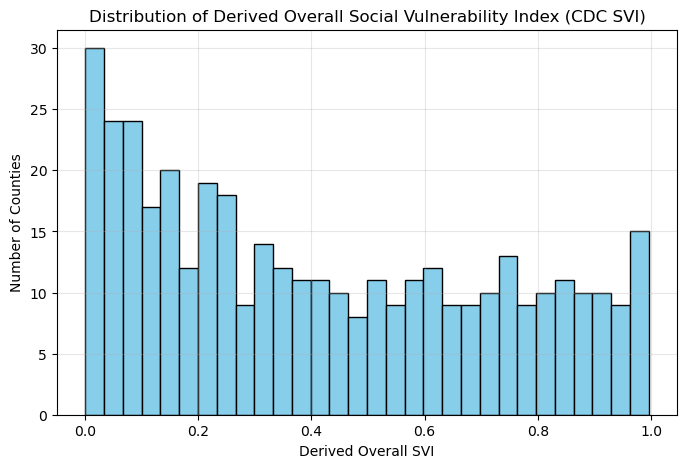

In [24]:
# --- Visualization 1: Histogram of Derived Overall SVI ---

plt.figure(figsize=(8, 5))
plt.hist(df['derived_overall_svi'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Derived Overall Social Vulnerability Index (CDC SVI)')
plt.xlabel('Derived Overall SVI')
plt.ylabel('Number of Counties')
plt.grid(alpha=0.3)
plt.show()


In [45]:
# --- Visualization 2: Average Vulnerability by State ---

if 'STATE' in df.columns:
    plt.figure(figsize=(12, 6))
    state_summary = df.groupby('STATE')['derived_overall_svi'].mean().sort_values(ascending=False)
    state_summary.head(15).plot(kind='bar', color='orange')
    plt.title('Top 15 States by Average Derived SVI (CDC Dataset)')
    plt.xlabel('State')
    plt.ylabel('Average Derived SVI')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


# Visualizations 
- ### Visualization 1
- The histogram below shows how vulnerability scores are distributed across U.S. counties.  
A right-skewed shape suggests that most counties have moderate to low vulnerability, with a smaller number of high-risk are
- ### Visualization 2
- """Average Vulnerability by State
This bar chart compares states by their **average derived SVI** to highlight regional differences.
"""

### Conclusions
- The derived overall SVI metric revealed clear disparities across U.S. regions.  
- States with higher averages may face greater disaster impacts or recovery challenges.  
- High-vulnerability counties could benefit from targeted resource allocation and mitigation efforts.  
- Future work could integrate temporal analysis or geographic mapping (e.g., using geopandas or Plotly choropleths).


